# Bootstraping

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [4]:
data_frame = pd.read_csv("Data.csv")

In [5]:
data_frame

,Annual income
0,117313.0
1,104002.0
2,113038.0
3,101936.0
4,84560.0
5,113136.0
6,80740.0
7,100536.0
8,105052.0
9,87201.0


## Mean

In [6]:
data_frame.mean()

Annual income    100200.366667
dtype: float64

## Median

In [7]:
data_frame.median()

Annual income    101236.0
dtype: float64

In [1]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [6]:
means = []

i=0

#confidence interval shrinks with more samples
while i<10000:
    means.append(resample(data_frame, replace=True, n_samples=len(data_frame)).mean())
    i+=1

In [24]:

df_means=pd.DataFrame(means)

In [19]:
df_means.sort_values(by='Annual income', inplace=True)

In [22]:
means.set_index='samples'

AttributeError: 'list' object has no attribute 'set_index'

In [12]:
df_means

,Annual income
9824,92940.233333
6548,93340.966667
1025,93391.666667
3797,93522.900000
382,93527.733333
1621,93553.366667
2154,93616.200000
4532,93820.600000
25,93841.533333
7060,93899.933333


In [13]:
# out of bag observations
#oob = [x for x in data_frame if x not in df_means]

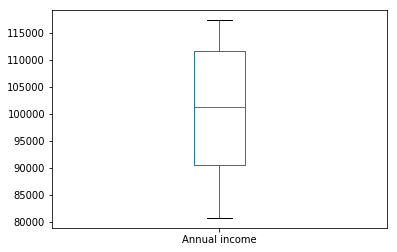

In [23]:
data_frame.plot.box()

In [25]:
# if we chose 5th and 95th percentile, we are eliminating 5% data on left and 5% data on right. 
# Total we are eliminating 10% of the data. We need to eliminate 5% of the data 
# We need to use the range 0.025 to 0.975 to elimiate 2.5% data on left and 2.5% data on right

confidence_interval = df_means.quantile([0.025,.975])

In [26]:
confidence_interval

,Annual income
0.025,96132.091667
0.975,104168.193333


In [37]:
lower_interval = confidence_interval.iloc[0,0]
upper_interval = confidence_interval.iloc[0,0]

print(lower_interval, upper_interval)

96132.09166666667 96132.09166666667


In [38]:
data_frame.mean()

Annual income    100200.366667
dtype: float64

In [19]:
if data_frame.mean().iloc[0] >= lower_interval and data_frame.mean().iloc[0] <= upper_interval:
    print('The true mean {} is between the confidence interval of {} and {}'.format(data_frame.mean().iloc[0], confidence_interval.iloc[0,0], confidence_interval.iloc[1,0]))

The true mean 100200.36666666667 is between the confidence interval of 96190.84333333332 and 104115.26999999999


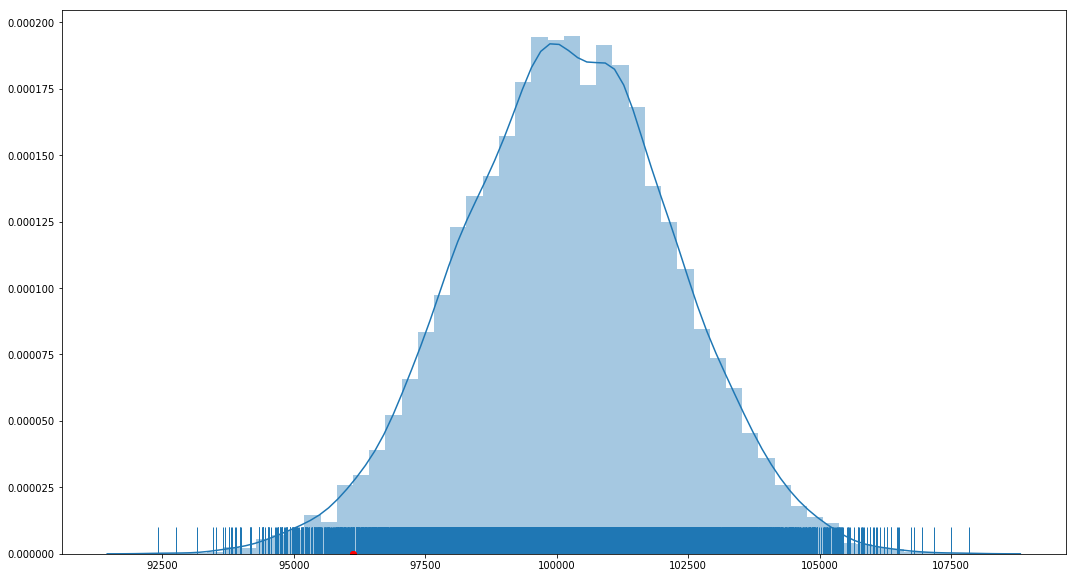

In [40]:
fig, ax = plt.subplots(figsize=(18,10)) # figsize in inches
sns.distplot(df_means, rug=True)
#sns.boxplot(data=df_means, orient="h", notch=True)

#wierd
x1 = [lower_interval, upper_interval]
x2 = [0.0, 0.0]    

ax.plot(x1, x2, 'red', linestyle='--', marker='o', lw=3)



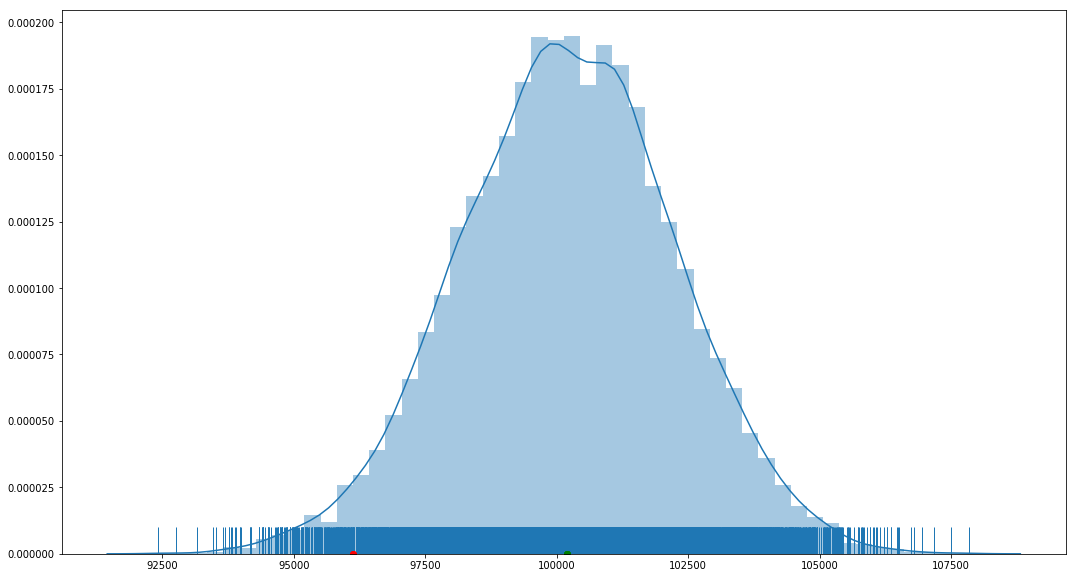

In [42]:

y1 = [data_frame.mean().iloc[0], data_frame.mean().iloc[0]]
y2 = [0.0, 0.0]


ax.plot(y1, y2, 'green', linestyle='--', marker='o', lw=3)
fig

# How many means are within the confidence interval?

In [22]:
df_means['isInInterval'] = df_means['Annual income'].apply(lambda x : x >= lower_interval and x <= upper_interval)

In [23]:
df_means.head()

,Annual income,isInInterval
8648,91891.566667,False
7555,92320.200000,False
5631,92790.566667,False
5727,92948.066667,False
1775,93159.066667,False


In [26]:
(sum(df_means['isInInterval']) / len(df_means))*100

95.0

### Bam!

## Verify

In [25]:
from scipy import stats

In [30]:
mean, sigma = data_frame.mean().iloc[0], data_frame.std().iloc[0]

# Sample standard error
standard_error = stats.sem(data_frame)[0] #sem = standard error of means

conf_int = stats.norm.interval(0.95, loc=mean, scale=standard_error)

In [31]:
conf_int

(96092.94726250485, 104307.78607082849)

In [32]:
df_means['isInInterval2'] = df_means['Annual income'].apply(lambda x : x > conf_int[0] and x < conf_int[1])
(sum(df_means['isInInterval2']) / len(df_means))*100

95.67999999999999

### Bam!

In [44]:
import inspect
inspect.signature(resample)

<Signature (*arrays, **options)>

In [48]:
?data_frame.plot.pie